In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as cx
# import datashader as ds
import plotly.express as px

In [2]:
data = pd.read_csv('master_df_regional_pop.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          1030 non-null   int64  
 1   Year                                1030 non-null   int64  
 2   Mo                                  1030 non-null   int64  
 3   Dy                                  1030 non-null   int64  
 4   Hr                                  1030 non-null   float64
 5   Mn                                  1030 non-null   float64
 6   Sec                                 1024 non-null   float64
 7   Tsu                                 168 non-null    float64
 8   Vol                                 7 non-null      float64
 9   Country                             1030 non-null   object 
 10  Location Name                       1030 non-null   object 
 11  Latitude                            1030 no

In [3]:
data.columns

Index(['Unnamed: 0', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu', 'Vol',
       'Country', 'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)',
       'Mag', 'MMI Int', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description',
       'Total Houses Damaged Description.1', 'Region', 'Average Income',
       'p0p50_share', 'Population density national', 'preperation_zone',
       'pop_with_water', 'pop_without_water', 'pop_total'],


In [4]:
data.fillna(0, inplace=True)

In [5]:
cols = [
    'Focal Depth (km)',
    'Mag',
    # 'Deaths',
    # 'Death Description',
    # 'Missing',
    # 'Missing Description',
    # 'Injuries',
    # 'Injuries Description',
    # 'Damage ($Mil)',
    # 'Damage Description',
    # 'Houses Destroyed',
    # 'Houses Destroyed Description',
    # 'Houses Damaged',
    # 'Houses Damaged Description',
    # 'Total Deaths',
    'Total Death Description',
    # 'Total Missing',
    'Total Missing Description',
    # 'Total Injuries',
    'Total Injuries Description',
    # 'Total Damage ($Mil)',
    'Total Damage Description',
    # 'Total Houses Destroyed',
    'Total Houses Destroyed Description',
    # 'Total Houses Damaged',
    'Total Houses Damaged Description',
    # 'Total Houses Damaged Description.1',
    'Average Income',
    'p0p50_share',
    'Population density national',
    'pop_with_water',
    'pop_without_water',
    'pop_total',
]
foo = data[cols]
foo

,Focal Depth (km),Mag,Total Death Description,Total Missing Description,Total Injuries Description,Total Damage Description,Total Houses Destroyed Description,Total Houses Damaged Description,Average Income,p0p50_share,Population density national,pop_with_water,pop_without_water,pop_total
0,10.0,5.1,0.0,0.0,1.0,3.0,4.0,4.0,4836.4401,0.1737,134.647500,196.047281,248.925429,2.089903e+07
1,33.0,5.9,1.0,0.0,4.0,4.0,4.0,0.0,4836.4401,0.1737,134.647500,75.744613,76.155580,3.829049e+07
2,33.0,6.3,0.0,0.0,0.0,1.0,2.0,0.0,4836.4401,0.1737,134.647500,36.681915,38.318019,4.788112e+07
3,33.0,4.2,1.0,0.0,3.0,4.0,0.0,0.0,4836.4401,0.1737,134.647500,67.648044,67.648044,1.307028e+06
4,33.0,5.3,1.0,0.0,1.0,2.0,2.0,3.0,13549.8134,0.1232,40.397152,30.027525,30.027525,5.372795e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,57.0,4.5,1.0,0.0,0.0,0.0,0.0,0.0,11865.0324,0.0572,26.019350,16.741938,47.586447,6.139603e+05
1026,26.0,7.4,1.0,0.0,1.0,4.0,0.0,4.0,17509.5857,0.0602,64.815605,17.807072,76.325811,2.091321e+08
1027,80.0,7.0,1.0,0.0,1.0,1.0,0.0,1.0,4920.7312,0.1291,21.529040,2.727130,12.827054,1.137706e+07
1028,10.0,6.6,1.0,0.0,1.0,1.0,3.0,4.0,9596.5646,0.1435,376.265170,46.977182,300.614178,1.098252e+08


/Users/tillboehringer/anaconda3/envs/dataproject_UZH/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tillboehringer/anaconda3/envs/dataproject_UZH/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tillboehringer/anaconda3/envs/dataproject_UZH/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tillboehringer/anaconda3/envs/dataproject_UZH/lib/python3.11/site-packages/sea

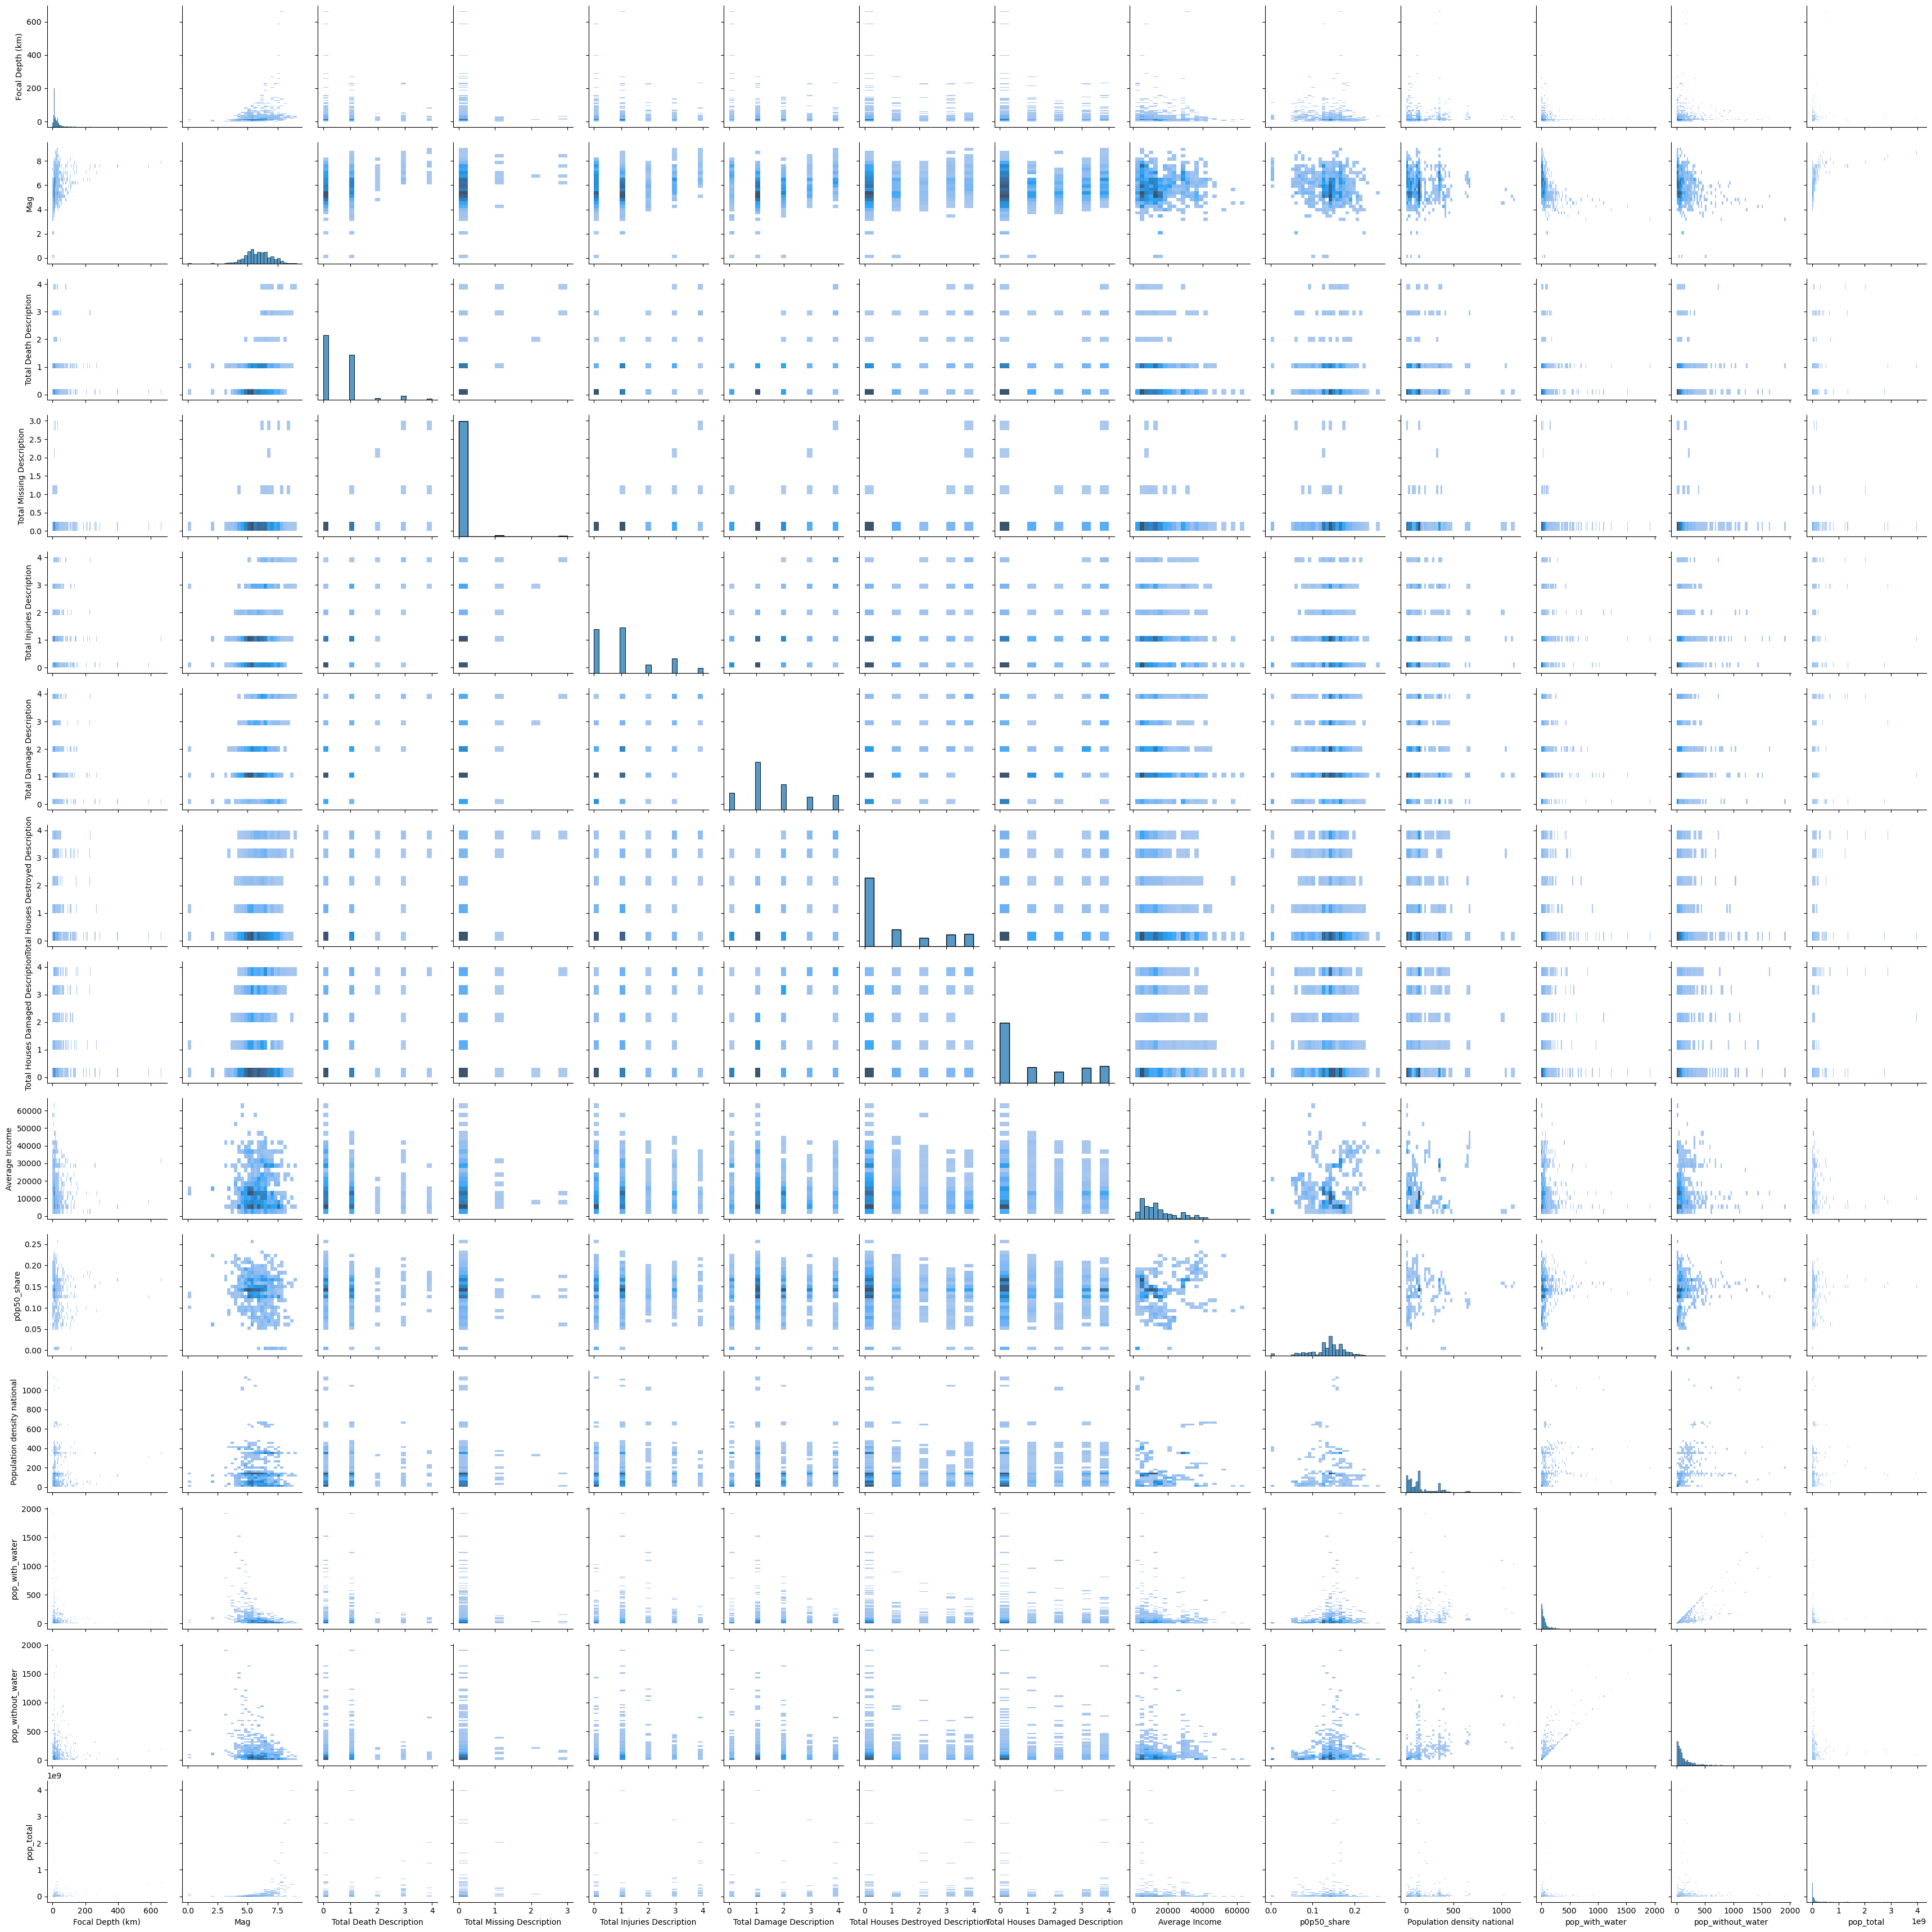

In [6]:
sns.pairplot(data=data, x_vars=cols, y_vars=cols, kind='hist')

In [7]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

In [8]:
data_geo = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude), crs='EPSG:4326')
data_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

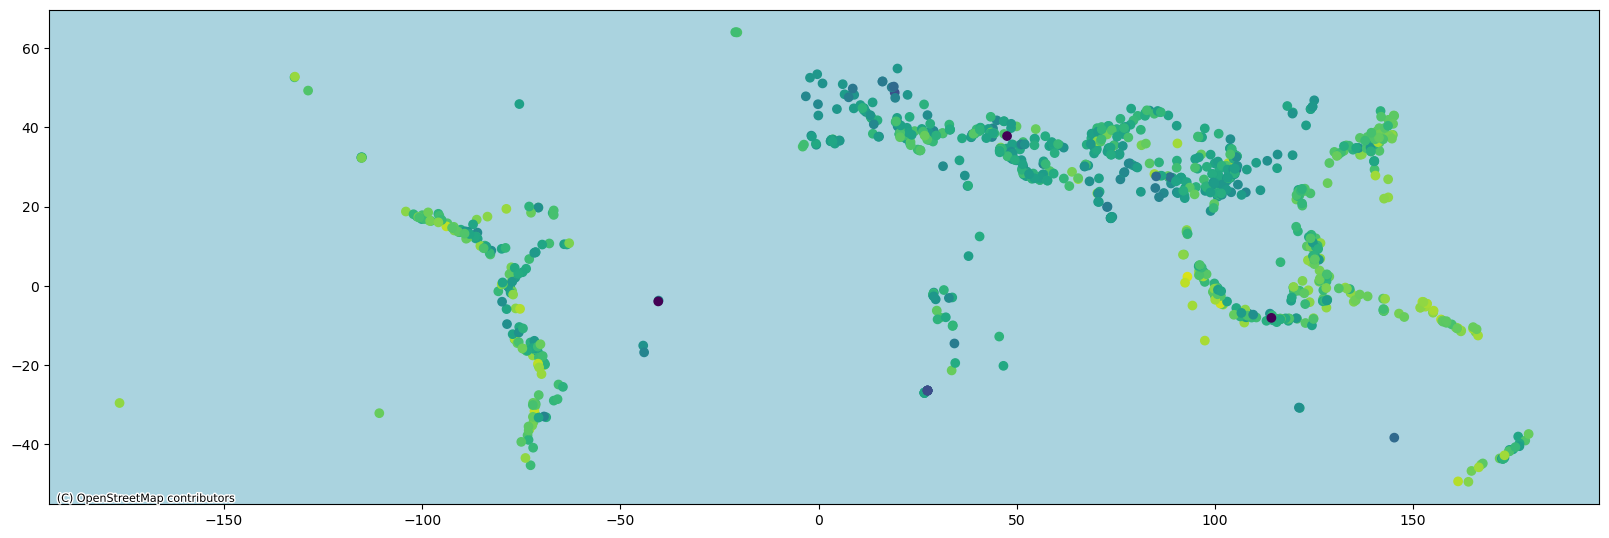

In [9]:
fig, ax = plt.subplots(figsize=(20,20))
ax = data_geo.plot(column='Mag', ax=ax)
cx.add_basemap(ax, source='OpenStreetMap.Mapnik')

In [22]:
fig = px.scatter_geo(data, lat=data.Latitude, lon=data.Longitude, hover_name='Country', color='Mag', hover_data=['Mag', 'pop_total'])
fig.update_geos(showcountries=True)
fig.show()